# Исследование рынка компьютерных игр

<div class="alert alert-info">
Шаг 1. Откроем файл с данными и изучим общую информацию
</div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
games = pd.read_csv('/datasets/games.csv')
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [2]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


<div class="alert alert-info">
Из info мы видим, что в некоторых столбцах есть пропуски - в Year_of_Release, Critic_Score, User_Score, Rating. В Name и Genre всего два пропуска, потом проверим, скорее всего, это одни и те же строки. Есть неправильные типы данных - в столбцe Year_of_Release можно поменять на int, в столбце User_Score - на float. Столбец Rating имеет тип object, т.к. рейтинг в данном случае обознается буквами. Выбросы и аномалии и явные дубликаты - непонятно, как распознать в info(
</div>

<div class="alert alert-info">
Шаг 2. Подготовим данные. Заменим названия столбцов (приведём к нижнему регистру)
</div>

In [3]:
games.columns = games.columns.str.lower()
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


<div class="alert alert-info">
Теперь преобразуем данные в нужные типы. Столбец <b>year_of_release</b> должен быть с типом int, так как год - целочисленный. Столбец <b>user_score</b> должен быть числовым - float, так как рейтинг - дробное число. Остальные столбцы - с нужным типом данным (<b>rating</b> - это тоже рейтинг, но он с буквами, поэтому оставляем object).
</div>

<div class="alert alert-info">
Столбец <b>year_of_release</b> должен быть с типом int, так как год - целочисленный. Но из-за пропусков он не может быть преобразован. Поэтому сначала посмотрим, сколько строк со значением Nan в столбце с годом. Их не очень много, можно их удалить. Теперь тип столбца - int.
</div>

In [5]:
games['year_of_release'].isna().sum()

269

In [6]:
games = games.dropna(subset = ['year_of_release']).reset_index(drop=True)
games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16441,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16442,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16443,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16444,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [7]:
games['year_of_release'].isna().sum()

0

In [8]:
games['year_of_release'] = games['year_of_release'].astype(int)
games['year_of_release'].head(10)

0    2006
1    1985
2    2008
3    2009
4    1996
5    1989
6    2006
7    2006
8    2009
9    1984
Name: year_of_release, dtype: int64

<div class="alert alert-info">
Столбец <b>user_score</b> должен быть числовым - float, так как рейтинг - дробное число.
</div

In [9]:
#games['user_score'] = pd.to_numeric(games['user_score'])

<div class="alert alert-info">
Код выше выдаёт ошибку из-за tbd значений (to be determined). Заменим на Nan
</div

In [10]:
games.loc[games['user_score'] == 'tbd'] = games.loc[games['user_score'] == 'Nan']

In [11]:
games['user_score'] = pd.to_numeric(games['user_score'], errors = 'coerce')
games['user_score'].describe()

count    7463.000000
mean        7.126330
std         1.499447
min         0.000000
25%         6.400000
50%         7.500000
75%         8.200000
max         9.700000
Name: user_score, dtype: float64

<div class="alert alert-info">
Далее проверим пропуски:
</div>

In [12]:
#print ('name', games['name'].isna().sum())
#print ('platform', games['platform'].isna().sum())
#print ('year_of_release', games['year_of_release'].isna().sum())
#print ('genre', games['genre'].isna().sum())
#print ('na_sales', games['na_sales'].isna().sum())
#print ('eu_sales', games['eu_sales'].isna().sum())
#print ('jp_sales', games['jp_sales'].isna().sum())
#print ('other_sales', games['other_sales'].isna().sum())
#print ('critic_score', games['critic_score'].isna().sum())
#print ('user_score', games['user_score'].isna().sum())
#print ('rating', games['rating'].isna().sum())

In [13]:
games.isna().sum()

name               2378
platform           2376
year_of_release    2376
genre              2378
na_sales           2376
eu_sales           2376
jp_sales           2376
other_sales        2376
critic_score       9519
user_score         8983
rating             9004
dtype: int64

<div class="alert alert-info">
Много похожего количества пропусков в столбцах, проверим, может, это одни и те же строки
</div>

In [14]:
games.loc[(games['platform'].isna())]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
516,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
639,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
710,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16428,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16435,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<div class="alert alert-info">
Действительно, есть полностью пустые строки, можем их убрать
</div>

In [15]:
games = games.dropna(subset = ['platform']).reset_index(drop=True)
games.tail(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14060,Strawberry Nauts,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
14061,15 Days,PC,2009.0,Adventure,0.00,0.01,0.00,0.0,63.0,5.8,NaN
14062,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.0,NaN,NaN,NaN
14063,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
14064,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,0.00,0.00,0.00,0.0,NaN,NaN,NaN
14065,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
14066,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
14067,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
14068,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
14069,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


<div class="alert alert-info">
Оставшиеся пропуски
</div>

In [17]:
games.isna().sum()

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       7143
user_score         6607
rating             6628
dtype: int64

In [18]:
games.loc[(games['name'].isna())&(games['genre'].isna())]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
648,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
12054,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


<div class="alert alert-info">
Думаю, эти две строчки без названия тоже можно удалять
</div>

In [19]:
games.dropna(subset = ['name']).reset_index(drop=True)
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [20]:
print ('critic_score', games['critic_score'].isna().sum())
print ('user_score', games['user_score'].isna().sum())
print ('rating', games['rating'].isna().sum())

critic_score 7143
user_score 6607
rating 6628


<div class="alert alert-info">
Остались пропуски в столбцах с рейтингами, но их удалять не будем. Возможно, данные рейтинги не использовались для некоторых локальных рынков, под которые создавалась игра.
</div>

<div class="alert alert-info">
Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец. Вставим его после продаж, но до рейтингов
</div>

In [21]:
games.insert(8, 'general_sales', (games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']))
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,general_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,82.54,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,35.52,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,32.77,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,31.38,NaN,NaN,NaN


<div class="alert alert-info">
Шаг 3. Проведём исследовательский анализ данных.
<br>
Посмотрим, сколько игр выпускалось в разные годы. Построим гистограмму.
</div>

In [22]:
games['year_of_release'] = games['year_of_release'].astype(int)
games['year_of_release'].describe()

count    14070.000000
mean      2006.321535
std          6.175711
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2011.000000
max       2016.000000
Name: year_of_release, dtype: float64

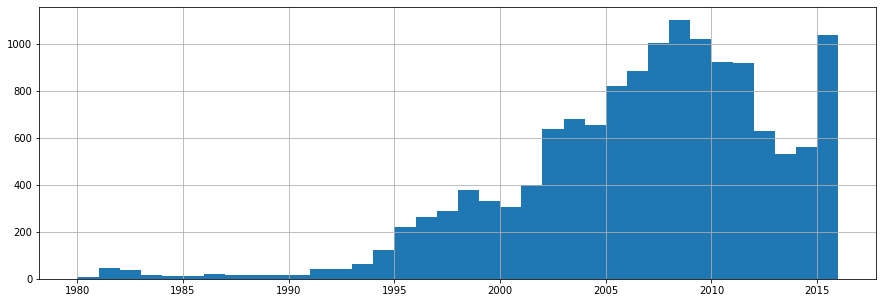

In [23]:
games['year_of_release'].hist(bins = 36, figsize = (15,5))
plt.show()

<div class="alert alert-info">
Чтобы планировать дальнейшие действия, возможно, нужно брать данные за последние 15 лет, но посмотрим далее
</div>

<div class="alert alert-info">
Пик в 10-ых годах в связи с распространением платформ, а спад в связи с появлением мобильных платформ

<div class="alert alert-info">
Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам.
</div>

In [24]:
top_platforms = (
    games.groupby('platform')['general_sales'].sum()
    .sort_values(ascending=False).head(10))
top_platforms

platform
PS2     1171.19
X360     948.74
PS3      921.09
Wii      791.91
PS       714.26
DS       655.36
PS4      314.00
PSP      273.11
GBA      263.70
GB       254.43
Name: general_sales, dtype: float64

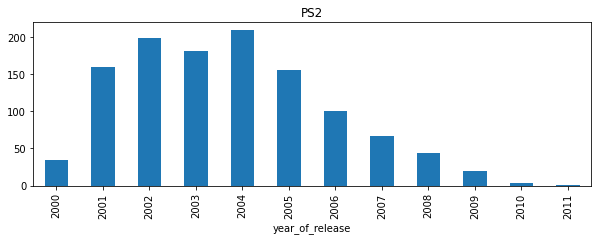

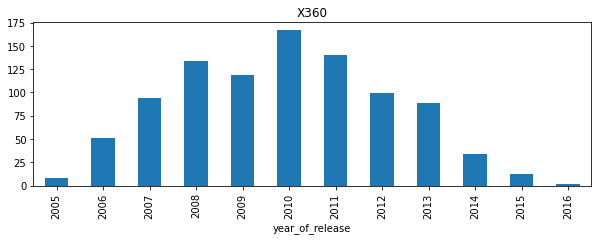

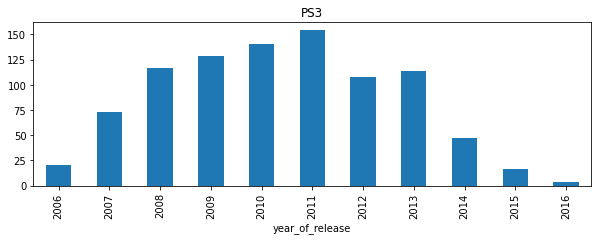

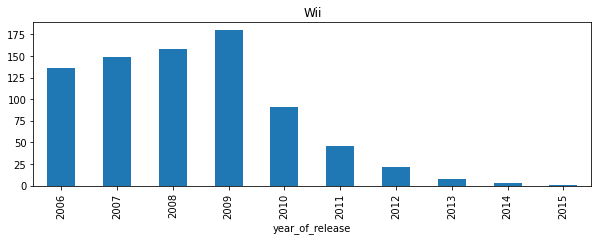

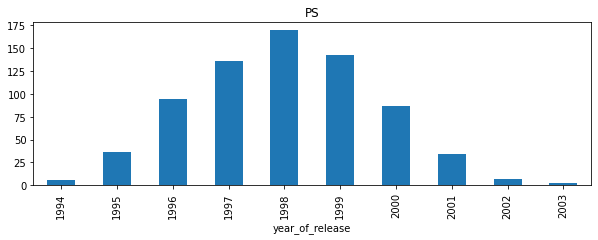

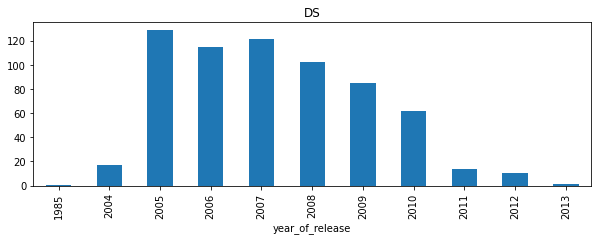

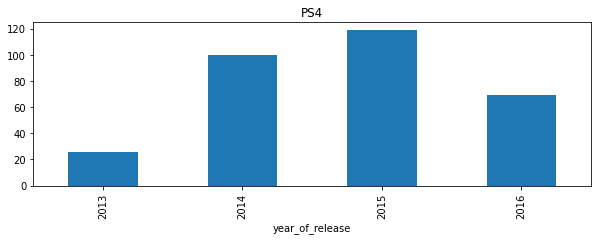

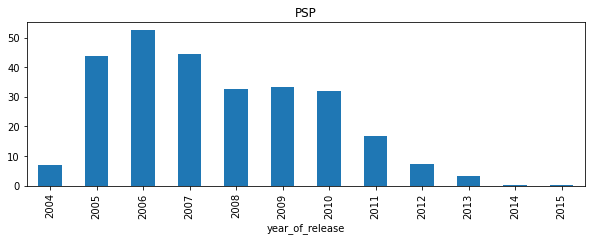

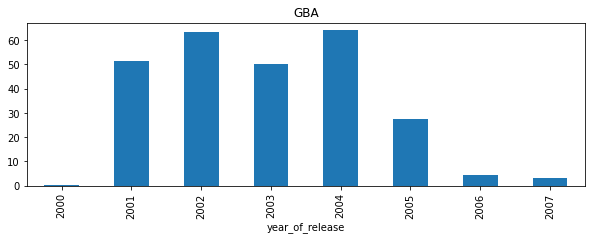

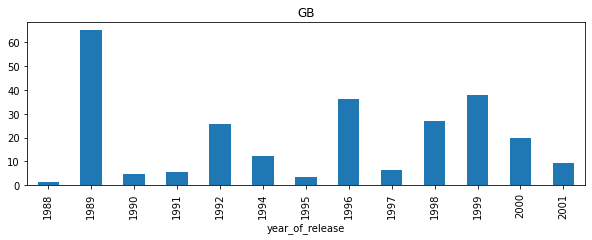

In [25]:
(games[games['platform'] == 'PS2']
      .groupby('year_of_release')['general_sales'].sum()
      .plot(kind='bar', x='year_of_release', y='general_sales', title='PS2', figsize=(10,3)))
plt.show()
(games[games['platform'] == 'X360']
      .groupby('year_of_release')['general_sales'].sum()
      .plot(kind='bar', x='year_of_release', y='general_sales', title='X360',figsize=(10,3)))
plt.show()
(games[games['platform'] == 'PS3']
      .groupby('year_of_release')['general_sales'].sum()
      .plot(kind='bar', x='year_of_release', y='general_sales', title='PS3',figsize=(10,3)))
plt.show()
(games[games['platform'] == 'Wii']
      .groupby('year_of_release')['general_sales'].sum()
      .plot(kind='bar', x='year_of_release', y='general_sales', title='Wii',figsize=(10,3)))
plt.show()
(games[games['platform'] == 'PS']
      .groupby('year_of_release')['general_sales'].sum()
      .plot(kind='bar', x='year_of_release', y='general_sales', title='PS',figsize=(10,3)))
plt.show()
(games[games['platform'] == 'DS']
      .groupby('year_of_release')['general_sales'].sum()
      .plot(kind='bar', x='year_of_release', y='general_sales', title='DS',figsize=(10,3)))
plt.show()
(games[games['platform'] == 'PS4']
      .groupby('year_of_release')['general_sales'].sum()
      .plot(kind='bar', x='year_of_release', y='general_sales', title='PS4',figsize=(10,3)))
plt.show()
(games[games['platform'] == 'PSP']
      .groupby('year_of_release')['general_sales'].sum()
      .plot(kind='bar', x='year_of_release', y='general_sales', title='PSP',figsize=(10,3)))
plt.show()
(games[games['platform'] == 'GBA']
      .groupby('year_of_release')['general_sales'].sum()
      .plot(kind='bar', x='year_of_release', y='general_sales', title='GBA',figsize=(10,3)))
plt.show()
(games[games['platform'] == 'GB']
      .groupby('year_of_release')['general_sales'].sum()
      .plot(kind='bar', x='year_of_release', y='general_sales', title='GB',figsize=(10,3)))
plt.show()

In [26]:
top_platforms_i = top_platforms.index

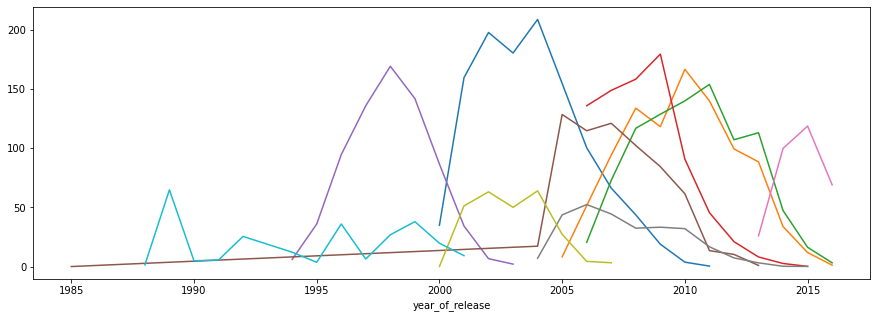

In [27]:
for i in top_platforms_i:
    (games[games['platform'] == i]
      .groupby('year_of_release')['general_sales'].sum()
      .plot(figsize=(15,5)))
plt.show()

<div class="alert alert-info">
Видно, что от появления до исчезновения проходит в среднем 10 лет, а от взлёта до падения проходит примерно 5 лет. За какой характерный срок появляются новые и исчезают старые платформы? 10 лет.
    <br>
За примерно 5 лет платформа достигает своего пика продаж. За 5-7 лет ее продажи падают почти до нуля. 
</div>

In [28]:
top_games = games.query('year_of_release >=2014')

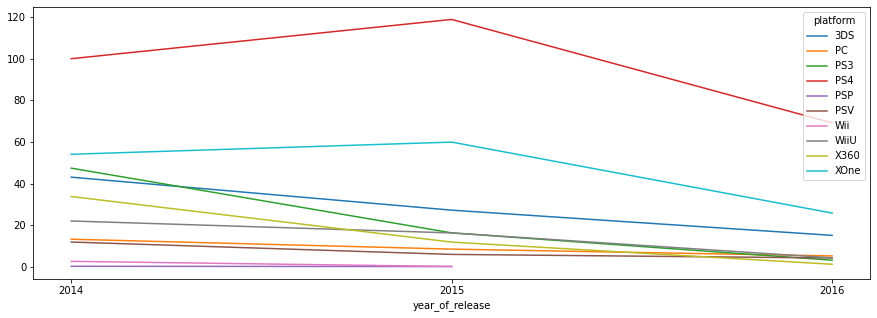

In [29]:
t_pl = top_games.pivot_table(index='year_of_release', columns='platform', values='general_sales', aggfunc = 'sum')
t_pl.plot(figsize=(15,5), xticks = [2014,2015,2016])
plt.show()

<div class="alert alert-info"> 
Возьмём данные за соответствующий актуальный период - 3 года. Так как нам надо спрогнозировать данные на 2017 год, возьмем данные за 2014-2016 годы.
<br>
В 2016 году у всех платформ спад по продажам. Но наиболее прибыльными были за 2014-2016 PS4, 3DS, XOne.
</div>

<div class="alert alert-info">
- Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
    <br>
Выберем пять - PS4, 3DS, XOne, PS3 и WiiU.

In [30]:
platform_past3 = ['PS4', '3DS', 'XOne', 'PS3', 'WiiU']

<div class="alert alert-info">Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.
</div>

In [31]:
top_games = games.query('(platform in @platform_past3) and (year_of_release >=2014)')

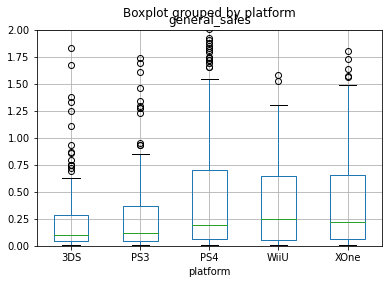

In [32]:
top_games.boxplot(column = 'general_sales', by='platform').set(ylim=(0,2))
plt.show()

<div class="alert alert-info">
Видно, что самые большие продажи приносили PS4 и WiiU и XOne. У этих платформ медианы на уровне плюс-минус 0.25 млн копий, и усы достигают самых больших значений.
</div>

<div class="alert alert-info">
Посмотрим, как влияют на продажи внутри одной популярной платформы (например, XOne) отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.
</div>

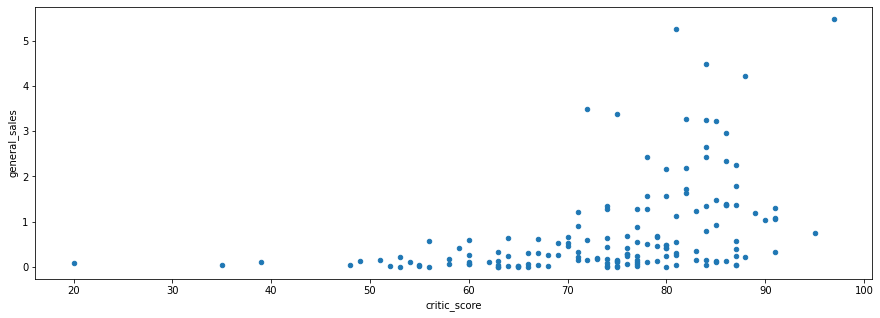

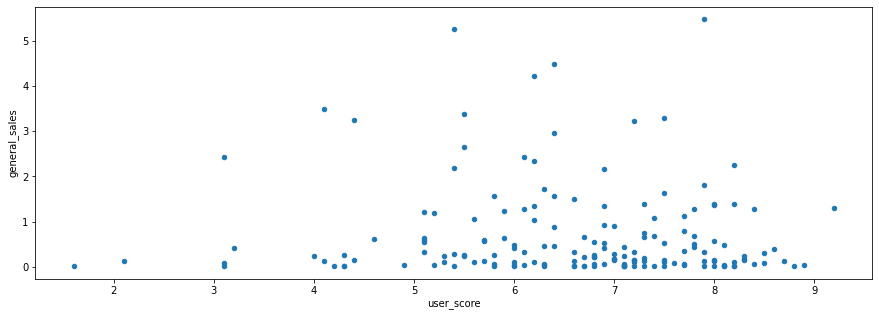

In [33]:
(top_games[top_games['platform']=='XOne']
 .plot(x='critic_score', y='general_sales', kind='scatter',figsize=(15,5)) ) #alpha=0.5
(top_games[top_games['platform']=='XOne']
 .plot(x='user_score', y='general_sales', kind='scatter',figsize=(15,5)) ) 
plt.show()

In [34]:
top_games[top_games['platform'] == 'XOne']['critic_score'].corr(top_games['general_sales'])

0.42410142946275287

In [35]:
top_games[top_games['platform'] == 'XOne']['user_score'].corr(top_games['general_sales'])

-0.0703839280647581

<div class="alert alert-info">
В первом случае корреляция прослеживается, отзывы критиков влияют на продажи, хоть и не очень сильно.
Отзывы клиентов нет, корреляция близка к нулю.
    <br>
Посмотрим на другие платформы
        <br>
    Начнем с отзывов критиков
</div>

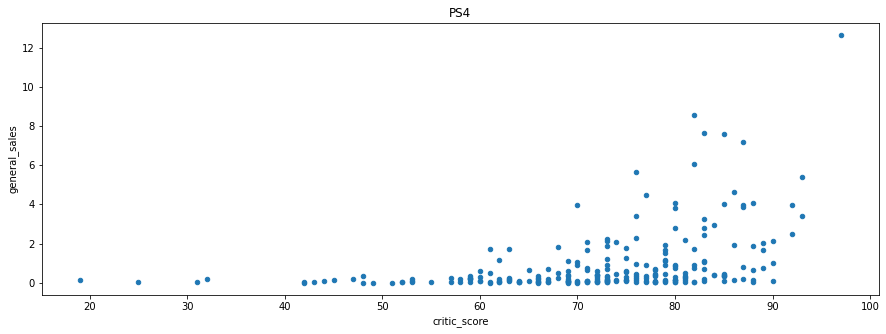

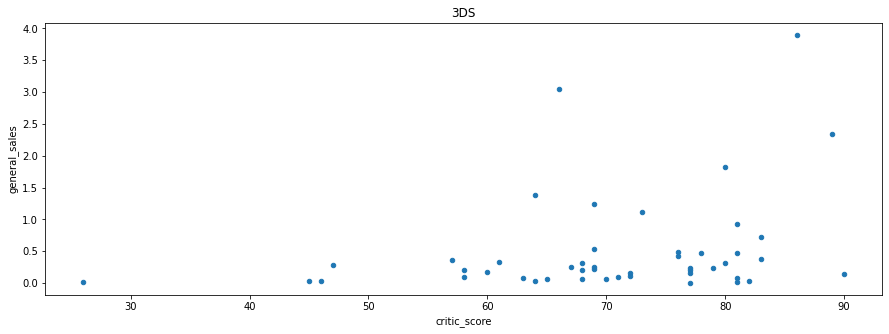

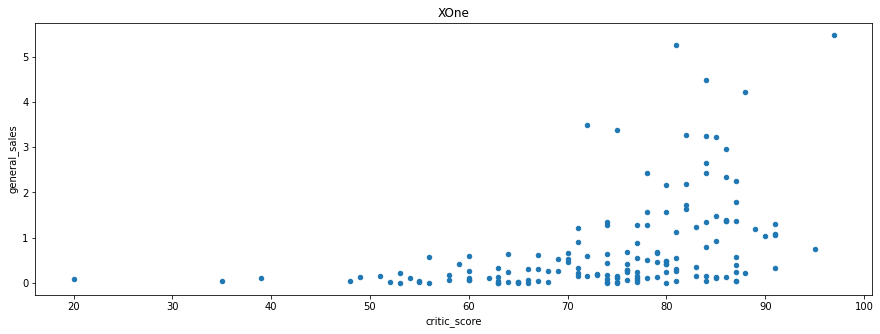

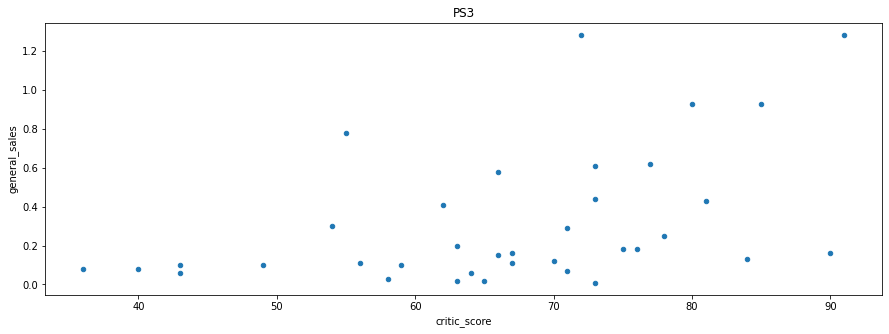

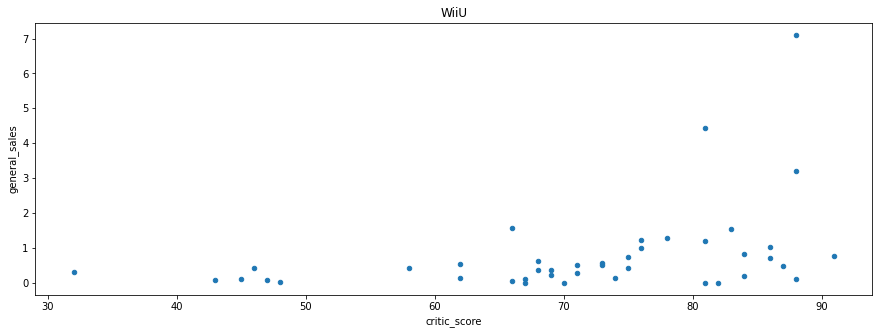

In [36]:
for i in platform_past3:
    (top_games[top_games['platform']==i]
     .plot(x='critic_score', y='general_sales', kind='scatter',title = i, figsize=(15,5)))

In [37]:
for i in platform_past3:
    cor=top_games[top_games['platform'] == i]['critic_score'].corr(top_games['general_sales'])
    print (i, cor)

PS4 0.40249779652369827
3DS 0.28468579095782925
XOne 0.42410142946275287
PS3 0.44657460493190704
WiiU 0.3756402218389979


<div class="alert alert-info">
Самая сильная корреляция у PS3, но и она слабая, отзывы критиков влияют на продажи, но не очень сильно. У PS4, XOne, PS3, WiiU корреляция чуть меньше 
    <br>
Посмотрим на отзывы пользователей
</div>

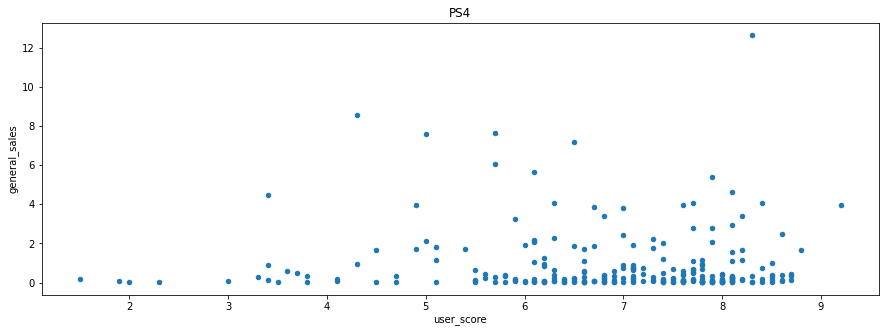

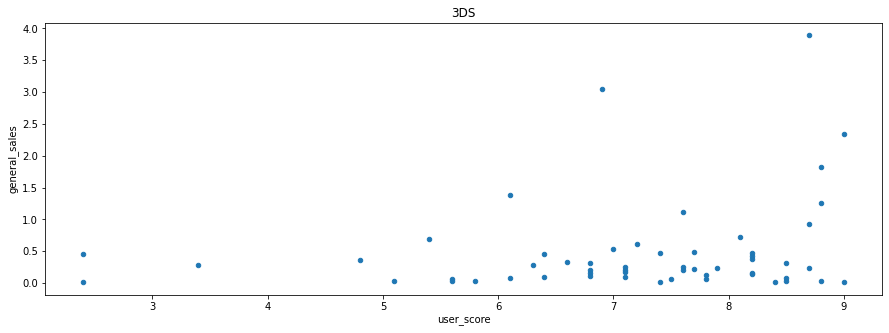

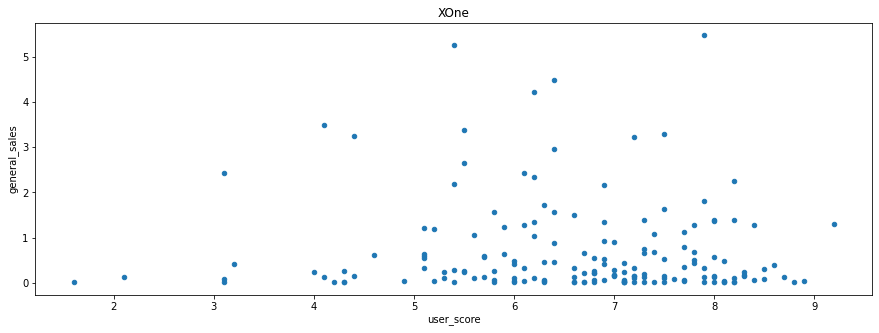

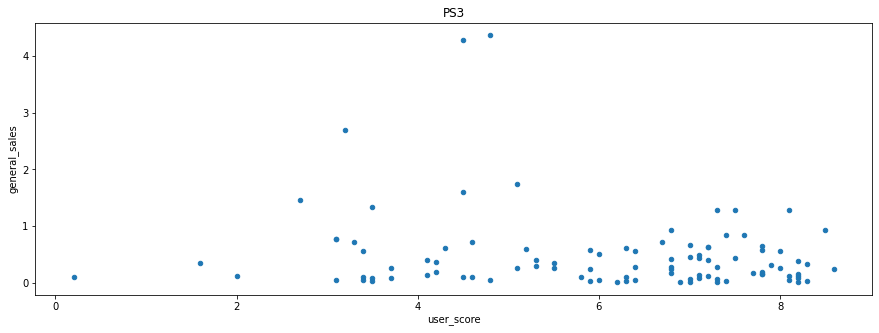

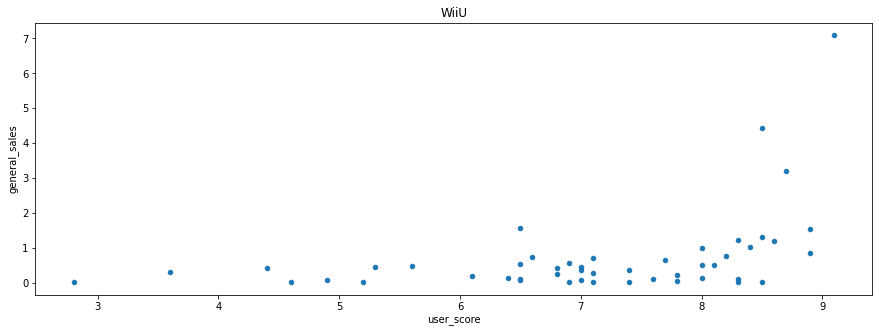

In [38]:
for i in platform_past3:
    (top_games[top_games['platform']==i]
     .plot(x='user_score', y='general_sales', kind='scatter',title = i, figsize=(15,5)))

In [39]:
for i in platform_past3:
    cor=top_games[top_games['platform'] == i]['user_score'].corr(top_games['general_sales'])
    print (i, cor)

PS4 -0.040131589472697356
3DS 0.2151932718527028
XOne -0.0703839280647581
PS3 -0.16676141347662118
WiiU 0.40792645792170773


<div class="alert alert-info">
Здесь наиболее заметная корреляция только у WiiU, у остальных платформ сильной или хотя бы чуть значимой корреляции нет. 
</div>

<div class="alert alert-info">
Посмотрим на общее распределение игр по жанрам.
</div>

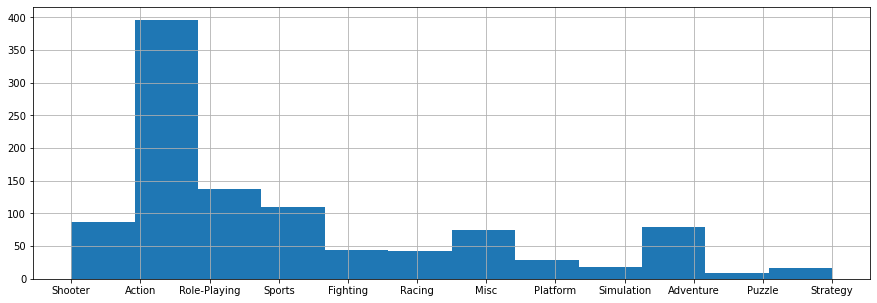

In [40]:
top_games['genre'].hist(figsize=(15,5), bins=12)
plt.show()

<div class="alert alert-info">
Самый популярный жанр с большим отрывом - Action, далее идут Role-Playing, Sports и Adventure, самые непопулярные - Puzzle и Strategy.
    <br>
Выделим 5 самых прибыльных жанров
</div>

In [41]:
top_genres = (
    top_games.groupby('genre')['general_sales'].median()
    .sort_values(ascending=False))
top_genres

genre
Shooter         0.760
Sports          0.370
Platform        0.230
Racing          0.170
Role-Playing    0.165
Simulation      0.160
Fighting        0.155
Misc            0.140
Action          0.130
Adventure       0.060
Puzzle          0.060
Strategy        0.060
Name: general_sales, dtype: float64

<div class="alert alert-info">
Интересно, что Action только на 9 месте по прибыльности, хотя в отрыве от всех по количеству, то есть получается, выпускают их больше, чем спрос на них
    <br>
Самые неприбыльные - Puzzle и Strategy и в количестве сильно отстают
        <br>
Самый прибыльный жанр - Shooter, он в средних по количеству
    <br>
А жанр Platform, наоборот, выпускают мало, но по прибыльности он на 3 месте
</div>

<div class="alert alert-info">
Шаг 4. Составьте портрет пользователя каждого региона Определите для пользователя каждого региона (NA, EU, JP): Самые популярные платформы (топ-5). Опишите различия в долях продаж. 
</div>

In [42]:
games_past3 = games.query('year_of_release >=2014')

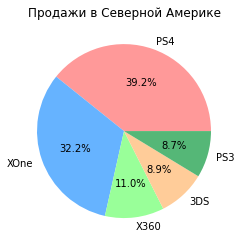

In [43]:
user_na = (
    games_past3.groupby('platform')['na_sales'].sum()
    .sort_values(ascending=False)).head()
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#55b777']
user_na.plot(kind='pie', subplots=True, figsize=(4,4),colors=colors,autopct='%1.1f%%')

plt.title("Продажи в Северной Америке")
plt.ylabel("")
plt.show()

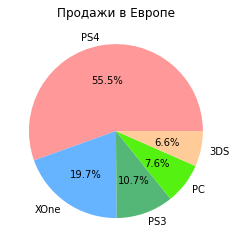

In [44]:
user_eu = (
    games_past3.groupby('platform')['eu_sales'].sum()
    .sort_values(ascending=False)).head()
colors = ['#ff9999','#66b3ff','#55b777','#55f111','#ffcc99']
user_eu.plot(kind='pie', subplots=True, figsize=(4,4),colors=colors,autopct='%1.1f%%')

plt.title("Продажи в Европе")
plt.ylabel("")
plt.show()

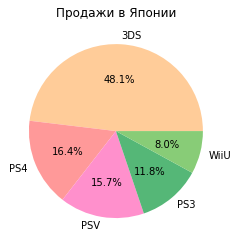

In [46]:
user_jp = (
    games_past3.groupby('platform')['jp_sales'].sum()
    .sort_values(ascending=False)).head()
colors = ['#ffcc99','#ff9999','#ff90cc','#55b777', '#88cc77']
user_jp.plot(kind='pie', subplots=True, figsize=(4,4),colors=colors,autopct='%1.1f%%')

plt.title("Продажи в Японии")
plt.ylabel("")
plt.show()


[]

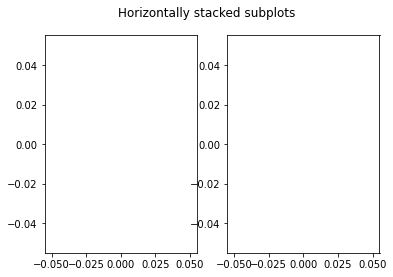

In [46]:
fig, (user_na, user_jp) = plt.subplots(1, 2)
fig.suptitle('Horizontally stacked subplots')
user_na.plot(kind='pie', subplots=True, figsize=(4,4),colors=colors,autopct='%1.1f%%')
user_jp.plot(kind='pie', subplots=True, figsize=(4,4),colors=colors,autopct='%1.1f%%')

<div class="alert alert-info">
В Америке и Европы 70% рынка занимают PS4 и XOne, только соотношение разное, в Европе на PS4 приходится 55% продаж, в Америке эти две платформы делят продажи примерно поровну. В Японии же данные сильно отличаются, не особо популярный в Америке и Европе 3DS на первом месте, PS4 на втором, PC и X360 нет вообще.Зато есть PSV и WiiU.
</div>

<div class="alert alert-info">
Разберём самые популярные жанры (топ-5):
</div>

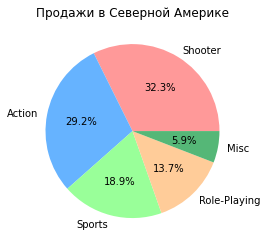

In [47]:
user_na = (
    games_past3.groupby('genre')['na_sales'].sum()
    .sort_values(ascending=False)).head()
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#55b777']
user_na.plot(kind='pie', subplots=True, figsize=(4,4),colors=colors,autopct='%1.1f%%')

plt.title("Продажи в Северной Америке")
plt.ylabel("")
plt.show()

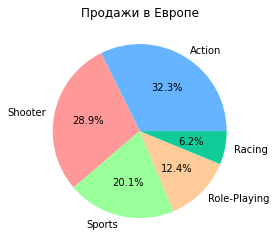

In [48]:
user_eu = (
    games_past3.groupby('genre')['eu_sales'].sum()
    .sort_values(ascending=False)).head()
colors = ['#66b3ff','#ff9999','#99ff99','#ffcc99', '#11cc99']
user_eu.plot(kind='pie', subplots=True, figsize=(4,4),colors=colors,autopct='%1.1f%%')

plt.title("Продажи в Европе")
plt.ylabel("")
plt.show()

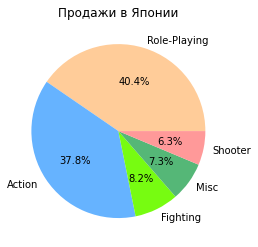

In [49]:
user_jp = (
    games_past3.groupby('genre')['jp_sales'].sum()
    .sort_values(ascending=False)).head()
colors = ['#ffcc99','#66b3ff','#77fc11','#55b777', '#ff9999']
user_jp.plot(kind='pie', subplots=True, figsize=(4,4),colors=colors,autopct='%1.1f%%')

plt.title("Продажи в Японии")
plt.ylabel("")
plt.show()

<div class="alert alert-info">
В Америке и Европе топ почти совпадает - в лидерах жанры Action, Shooter, Sports, Role-Playing. Разница только в последнем жанре - в Америке это Misc, в Европе - Racing. В Японии безоговорочно лидирует жанр Role-Playing, далее идут Action, Fighting, Misc, Shooter. Racing в японском топ5 отсутствует.
</div>

<div class="alert alert-info">
Посмотрим, влияет ли рейтинг ESRB на продажи в отдельном регионе. ESRB - это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых»(M), «Для подростков»(T), "Для всех"(E), "Для всех старше 10 лет"(E10+).
</div>

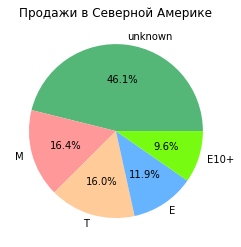

In [60]:
rating_na = (
    games_past3.groupby('rating')['na_sales'].count()
    .sort_values(ascending=False)).head()
colors = ['#55b777','#ff9999','#ffcc99','#66b3ff', '#77fc11']
rating_na.plot(kind='pie', subplots=True, figsize=(4,4),colors=colors,autopct='%1.1f%%')

plt.title("Продажи в Северной Америке")
plt.ylabel("")
plt.show()

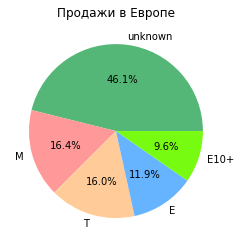

In [59]:
rating_eu = (
    games_past3.groupby('rating')['eu_sales'].count()
    .sort_values(ascending=False)).head()
colors = ['#55b777','#ff9999','#ffcc99','#66b3ff', '#77fc11']
rating_eu.plot(kind='pie', subplots=True, figsize=(4,4),colors=colors,autopct='%1.1f%%')

plt.title("Продажи в Европе")
plt.ylabel("")
plt.show()

In [57]:
games_past3['rating'] = games_past3['rating'].fillna(value='unknown')
games_past3

/tmp/ipykernel_31/1187883914.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games_past3['rating'] = games_past3['rating'].fillna(value='unknown')


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,general_sales,critic_score,user_score,rating
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,14.63,NaN,NaN,unknown
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,12.62,97.0,8.3,M
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,11.68,NaN,NaN,unknown
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,8.58,82.0,4.3,E
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,7.98,NaN,NaN,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...
14060,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.01,NaN,NaN,unknown
14062,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,0.01,NaN,NaN,unknown
14065,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0.01,NaN,NaN,unknown
14067,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.01,NaN,NaN,unknown


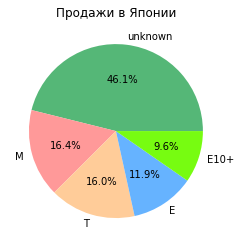

In [58]:
rating_jp = (
    games_past3.groupby('rating')['jp_sales'].count()
    .sort_values(ascending=False)).head()
colors = ['#55b777','#ff9999','#ffcc99','#66b3ff', '#77fc11']
rating_jp.plot(kind='pie', subplots=True, figsize=(4,4),colors=colors,autopct='%1.1f%%')

plt.title("Продажи в Японии")
plt.ylabel("")
plt.show()

<div class="alert alert-info">
Получаются одинаковые цифры во всех регионах. Значит, рейтинг ESRB на продажи в отдельном регионе не влияет. 
</div>

<div class="alert alert-info">
Шаг 5. Проверим гипотезы:
</div>

<div class="alert alert-info">
<b>Гипотеза 1.</b> Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
<br>
Сформулируем следующие гипотезы:
    <br>
Нулевая гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC равны
    <br>
Альтернативная гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC не равны
    <br>
Выберем значение альфа = 0.05 как наиболее распространенное
        <br>
Выбираем критерий для проверки двух генеральных независимых совокупностей, так как продажи двух разных платформ не зависят друг от друга
</div>

In [52]:
from scipy import stats as st

alpha = 0.05 

Xbox_One = (games_past3[games_past3['platform'] == 'XOne']['user_score'].dropna())

PC = (games_past3[games_past3['platform'] == 'PC']['user_score'].dropna())

results =  st.ttest_ind(Xbox_One, PC)
print (results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 


0.10450507919348415
Не получилось отвергнуть нулевую гипотезу


<div class="alert alert-info">
Следовательно, средние пользовательские рейтинги платформ Xbox One и PC могут быть равны, нулевая гипотеза верна
</div>


<div class="alert alert-info">
<b>Гипотеза 2.</b> Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
    <br>
Нулевая гипотеза: Средние пользовательские рейтинги жанров Action и Sports равны
    <br>
Альтернативная гипотеза: Средние пользовательские рейтинги жанров Action и Sports не равны
    <br>
Выбираем критерий для проверки двух генеральных независимых совокупностей, так как продажи игр двух разных жанров не зависят друг от друга
    <br>
    Удобнее сначала проверить равенство двух совокупностей
</div>


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Гипотезы сформулирован верно!

In [53]:
action = games_past3[games_past3['genre'] == 'Action']['user_score'].dropna()
sports = games_past3[games_past3['genre'] == 'Sports']['user_score'].dropna()

alpha = 0.05
results2 = st.ttest_ind(action, sports)
print (results2.pvalue)
if results2.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

2.8711147985105864e-19
Отвергаем нулевую гипотезу


<div class="alert alert-info">
Из этого следует, что верна альтернативная гипотеза - средние пользовательские рейтинги жанров Action и Sports не равны
</div>

# Общий вывод

<div class="alert alert-info">
    В первую очередь подготовили данные, заменили названия столбцов(привели к нижнему регистру для удобства), преобразовали данные в нужные типы - столбец <b>year_of_release</b> в тип int, так как год - целочисленный, столбец <b>user_score</b> - в float, так как рейтинг - дробное число. Остальные столбцы - с нужным типом данным (<b>rating</b> - это тоже рейтинг, но он с буквами, поэтому оставили object).
            <br>
            <br>
При внимательном рассмотрении датасета нашли пропущенные значения в некоторых столбцах. В столбце <b>year_of_release</b> удалили пропущенные значения. В столбце <b>user_score</b> заменили tbd значения (to be determined) на Nan.
            <br>
            <br>
    Далее посчитали суммарные продажи во всех регионах и записали их в отдельный столбец <b>general_sales</b>.
            <br>
   Провели исследовательский анализ данных.
<br>
            <br>
   Построили гистограмму по количеству игр в разные годы. Выбрали платформы с наибольшими суммарными продажами и построили распределение по годам. 
    Видно, что от появления до исчезновения проходит в среднем 10 лет, а от взлёта до падения проходит примерно 5 лет. За примерно 5 лет платформа достигает своего пика продаж. За 5-7 лет ее продажи падают почти до нуля. 
    Далее брали данные за соответствующий актуальный период - 3 года. Так как нам надо спрогнозировать данные на 2017 год, взяли данные за 2014-2016 годы.
    <br>
            <br>
Выяснили, что в 2016 году у всех платформ спад по продажам. Но наиболее прибыльными были за 2014-2016 PS4, 3DS, XOne. 
            <br>
            <br>
Построили график «ящик с усами» по глобальным продажам игр в разбивке по платформам.
Видно, что самые большие продажи приносили PS4 и WiiU и XOne. У этих платформ медианы на уровне плюс-минус 0.25 млн копий, и усы достигают самых больших значений.
            <br>
            <br>
Рассмотрели, как влияют на продажи внутри одной популярной платформы (XOne) отзывы пользователей и критиков. Построили диаграмму рассеяния и посчитали корреляцию между отзывами и продажами.
Корреляция прослеживается, отзывы критиков несильно влияют на продажи, отзывы клиентов нет.
    <br>
            <br>
У других платформ отзывы критиков: 
   Самая сильная корреляция у PS3, но и она слабая, отзывы критиков влияют на продажи, но не очень сильно. У PS4, XOne, PS3, WiiU корреляция чуть меньше 
    <br>    
    <br>
Что касается отзывов пользоватлей, здесь наиболее заметная корреляция только у WiiU, у остальных платформ сильной или хотя бы чуть значимой корреляции нет. 
    <br>
        <br>
            <br>
Самый популярный жанр с большим отрывом - Action, далее идут Role-Playing, Sports и Adventure, самые непопулярные - Puzzle и Strategy.
    <br>
    <br>
Интересно, что Action только на 9 месте по прибыльности, хотя в отрыве от всех по количеству, то есть получается, выпускают их больше, чем спрос на них
    <br>
Самые неприбыльные - Puzzle и Strategy и в количестве сильно отстают
        <br>
Самый прибыльный жанр - Shooter, он в средних по количеству
    <br>
А жанр Platform, наоборот, выпускают мало, но по прибыльности он на 3 месте
        <br>
            <br>
   Составили портрет пользователя каждого региона. 
        <br>
В Америке и Европы 70% рынка занимают PS4 и XOne, только соотношение разное, в Европе на PS4 приходится 55% продаж, в Америке эти две платформы делят продажи примерно поровну. В Японии же данные сильно отличаются, не особо популярный в Америке и Европе 3DS на первом месте, PS4 на втором, PC и X360 нет вообще.Зато есть PSV и WiiU.
        <br>
    Самые популярные жанры (топ-5).
    В Америке и Европе топ почти совпадает - в лидерах жанры Action, Shooter, Sports, Role-Playing. Разница только в последнем жанре - в Америке это Misc, в Европе - Racing. В Японии безоговорочно лидирует жанр Role-Playing, далее идут Action, Fighting, Misc, Shooter. Racing в японском топ5 отсутствует.
        <br>
            <br>
    Влияет ли рейтинг ESRB на продажи в отдельном регионе? 
Получаются одинаковые цифры во всех регионах. Значит, рейтинг ESRB на продажи в отдельном регионе не влияет. 
        <br>
            <br>
<b>Гипотеза 1.</b> Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
    <br>
Нулевая гипотеза принята.
Средние пользовательские рейтинги платформ Xbox One и PC могут быть равны, верна нулевая гипотеза
         <br>
            <br>
<b>Гипотеза 2.</b> Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
    <br>
Нулевая гипотеза (равенство) не принята 
    Из этого следует, что верна альтернативная гипотеза - средние пользовательские рейтинги жанров Action и Sports не равны
</div>